In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import pandas as pd
import cmcrameri as cmcm
import juanfit

In [29]:
df = pd.read_excel("../../save/eis_line_list_final_v2.xlsx",sheet_name="resolve")
df["ion"] = df["ion"].str.strip()
df["charge_stat"] = df["charge_stat"].str.strip()
df["quality"] = df["quality"].str.strip()
df["fwhm_true_err"] = df["fwhm_fit"]/df["fwhm_true"]*df["fwhm_err"]
df["fwhm_cross_err"] = df["fwhm_fit"]/df["fwhm_true_cross"]*df["fwhm_err"]
df

,ion,charge_stat,Z,A,temp,wvl_fit,wvl_chianti,fwhm_fit,fwhm_err,fwhm_true,fwhm_awsom_fit,fwhm_awsom_err,fwhm_awsom_true,quality,desc,fwhm_true_cross,fwhm_true_err,fwhm_cross_err
0,Fe,x,9,55.85000,5.9,174.521,174.531,0.07940,0.00150,0.0380,0.082,0.000030,0.0434,a,NaN,0.049034,0.003134,0.002429
1,Fe,ix,8,55.85000,5.8,176.971,176.945,0.06490,0.00480,NaN,0.081,0.000800,0.0414,c,NaN,0.017664,NaN,0.017636
2,Fe,x,9,55.85000,5.9,177.230,177.240,0.08077,0.00064,0.0407,0.083,0.000200,0.0440,a,NaN,0.051223,0.001270,0.001009
3,Fe,xi,10,55.85000,6.0,182.163,182.167,0.08020,0.00150,0.0396,0.086,0.000100,0.0503,a,NaN,0.050319,0.003038,0.002391
4,Fe,x,9,55.85000,5.9,182.304,182.307,0.08560,0.00270,0.0496,0.082,0.000500,0.0423,b,NaN,0.058544,0.004660,0.003948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Mg,vii,6,24.30500,5.8,280.727,280.742,0.07790,0.00730,0.0358,0.097,0.000008,0.0676,b,NaN,0.046566,0.015885,0.012212
80,Al,ix,8,26.98154,5.9,282.415,282.422,0.09300,0.01600,0.0629,0.103,0.000080,0.0755,b,NaN,0.068913,0.023657,0.021592
81,Al,ix,8,26.98154,5.9,284.032,284.042,0.09120,0.00760,0.0594,0.113,0.001000,0.0882,b,NaN,0.066464,0.011669,0.010429
82,Fe,xv,14,55.85000,6.2,284.161,284.163,0.05600,0.00870,NaN,0.094,0.002000,0.0623,c,sim too hot,NaN,NaN,NaN


In [30]:
for index,row in df.iterrows():
    print(row["ion"],row["charge_stat"],row["wvl_chianti"],"{:.1f} {:.1f}".format(row["fwhm_true_cross"]*1e3,row["fwhm_cross_err"]*1e3))

Fe x 174.531 49.0 2.4
Fe ix 176.945 17.7 17.6
Fe x 177.24 51.2 1.0
Fe xi 182.167 50.3 2.4
Fe x 182.307 58.5 3.9
O vi 183.937 74.6 4.0
O vi 184.117 51.7 1.9
Fe x 184.537 48.4 0.4
Fe viii 185.213 44.1 0.8
Mn viii 185.463 54.4 5.9
Fe viii 186.598 49.7 1.1
Fe viii 187.24 74.9 6.6
Fe xi 188.216 50.5 0.5
Fe xi 188.299 50.5 0.5
Fe xi 188.997 59.1 29.1
Fe ix 189.572 35.8 20.1
Fe xi 189.711 59.1 17.5
Fe ix 189.935 41.7 0.9
Fe x 190.037 50.4 0.8
Fe xi 190.382 62.8 12.8
Fe ix 191.206 45.2 3.1
Mn ix 191.635 64.8 5.6
Fe xii 192.394 52.1 3.7
Fe xi 192.627 52.7 2.5
Fe xii 193.509 50.9 0.8
Fe x 193.715 46.4 2.0
Fe viii 193.968 23.7 12.4
Mn x 194.299 43.7 5.2
Fe viii 194.661 45.3 0.8
Fe xii 195.119 56.7 0.8
Fe vii 195.484 12.0 44.9
Fe viii 195.972 57.8 1.1
Fe vii 196.213 50.0 19.2
Fe xiii 196.525 nan nan
Fe viii 197.362 62.8 2.3
Fe ix 197.854 51.3 0.6
Ni xi 198.424 74.1 10.7
Mn ix 199.318 37.2 15.6
Fe x 201.565 56.3 5.1
Fe xi 201.734 44.7 8.9
Fe xiii 202.044 53.4 2.0
Fe xi 202.424 60.0 4.3
Fe xi 202.70

In [4]:
df_test = df.loc[(df["ion"] == "Fe") & (df["charge_stat"] == "xi") & (df["quality"] == "a")]

In [5]:
def aver_err(data,err,thresh=1.e-5,iter_max=1000):
    sigma_sq = np.var(data)
    n_data = len(data)

    if type(data) is list:
        data = np.array(data)
    if type(err) is list:
        err = np.array(err)

    err_sq_mean = np.mean(np.square(err)) 
    for ii in range(iter_max):
        weight = 1./(sigma_sq + err**2)
        weight = weight/np.sum(weight)
        aver_new = np.sum(weight*data)
        sigma_new_sq = np.max([0.,n_data/(n_data - 1.)*np.sum(weight*np.square(data-aver_new)) - \
                                err_sq_mean])
        
        #print(aver_new,sigma_new_sq)
        if ((sigma_new_sq <= sigma_sq*(1+thresh)) and (sigma_sq <= sigma_new_sq*(1+thresh))):
            break
        else:
            sigma_sq = sigma_new_sq
        
    # if sigma_new_sq == 0:
    #     print("sigma_new is 0.")

    sigma_tot = np.sqrt(1./np.sum(1./(sigma_new_sq + err**2)))
    return aver_new, sigma_tot, sigma_new_sq

# print(aver_err([10,12,7,8],[0.8,1.2,0.5,1.5]))

# aver_bootstrap = np.zeros(5000)
# for ii in range(5000):
#     data = np.random.normal(9.1673963016428,np.sqrt(3.8011034789338853),4)
#     epsilon = np.random.normal(0,[0.8,1.2,0.5,1.5])
#     data_gen = data + epsilon
#     aver_bootstrap[ii], _, _ = aver_err(data_gen,[0.8,1.2,0.5,1.5]) 

# print(np.percentile(aver_bootstrap,[2.5,50,97.5]))

In [6]:
def plot_eis_awsom_width(df,ion,charge=None,quality="a",plot_awsom=False,plot_mle=False,print_df=False,
                        print_veff=False,save_fig=False,save_fname=None,bootstrap=True):
    c = const.c.cgs/1.e5

    if type(ion) is str:
        ion = [ion]
    if type(charge) is str:
        charge = [charge]
    if type(quality) is str:
        quality = [quality]
    
    if charge is None:
        df_plot = df[(df["ion"].isin(ion)) & (df["quality"].isin(quality))].copy()
    else:
        df_plot = df[(df["ion"].isin(ion)) & (df["charge_stat"].isin(charge)) \
                    & (df["quality"].isin(quality))].copy()

    line_name = df_plot["ion"] + r" \textsc{"+ df_plot["charge_stat"] + r"} " + \
         ((df_plot["wvl_chianti"].values).astype("int")).astype("str")

    eis_veff = df_plot["fwhm_true_cross"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

    awsom_veff = df_plot["fwhm_awsom_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

    eis_veff_err = df_plot["fwhm_err"]*df_plot["fwhm_fit"] \
                    /df_plot["fwhm_true_cross"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

    awsom_veff_err = df_plot["fwhm_awsom_err"]*df_plot["fwhm_awsom_fit"] \
                    /df_plot["fwhm_awsom_true"]/df_plot["wvl_chianti"]*c//np.sqrt(4*np.log(2))


    df_plot["eis_veff"] = eis_veff
    df_plot["awsom_veff"] = awsom_veff
    df_plot["eis_veff_err"] = eis_veff_err

    n_lines = len(df_plot.index)
    plot_x = np.arange(n_lines)

    fig, ax = plt.subplots(figsize=(n_lines*1.2+2,6),constrained_layout=True)

    if plot_mle is True:
        best_est,err_tot, err_est_sq = aver_err(eis_veff,eis_veff_err)
        best_low1sig,best_up1sig = best_est - err_tot, best_est + err_tot
        best_low3sig,best_up3sig = best_est - 3*err_tot, best_est + 3*err_tot
        aver_bootstrap = np.zeros(10000)
        if bootstrap is True:
            for ii in range(10000):
                data = np.random.normal(best_est,np.sqrt(err_est_sq),len(eis_veff))
                epsilon = np.random.normal(0,eis_veff_err)
                data_gen = data + epsilon
                aver_bootstrap[ii], _, _ = aver_err(data_gen,eis_veff_err) 
            best_low3sig,best_low1sig,best_est,best_up1sig,best_up1sigbest_up3sig = \
                np.percentile(aver_bootstrap,[0.15,16,50,84,99.85])



        ax.axhspan(best_low1sig,best_up1sig,color="#FAD689",alpha=0.9)
        ax.axhspan(best_low3sig,best_up3sig,color="#FAD689",alpha=0.5)
        ax.axhline(best_est,color="#FFB11B",lw=2,ls="--",label=r"$\bar{v}_{\rm eff}$")
    
    if plot_awsom:
        ax.errorbar(plot_x,awsom_veff,awsom_veff_err,color="#0089A7",ls="none",marker="d",
                    markersize=6,capsize=5,lw=2,label="AWSoM",zorder=15)
    ax.errorbar(plot_x,eis_veff,eis_veff_err,color="#CC543A",ls="none",marker="o",
                markersize=6,capsize=5,lw=2,label="EIS",zorder=15)


    # ax.scatter(plot_x,awsom_veff,color="#0089A7",marker="o",
    #             lw=3,label="AWSoM",zorder=14)


    ax.set_xlim(left=-1,right=len(line_name))
    ax.set_xticks(plot_x)
    ax.set_xticklabels(line_name)
    ax.tick_params(labelsize=16)
    ax.set_xlabel("Line",fontsize=16)
    ax.set_ylabel(r"Effective Velocity $v_{\rm eff}\ \left[\mathrm{km \cdot s^{-1}} \right]$",
                    fontsize=16)

    if charge is not None:
        title = r"\textbf{" + ion[0] + ' '.join([r" \textsc{" + charge_ +r"} " for charge_ in charge]) + \
                r"}"
    else:
        title = r"\textbf{" + ion[0] + r"}"

    if (plot_mle is True) and (bootstrap is False):
        title = title + r" $\bar{{v}}_{{\rm eff}} = {{{:.1f}}}\pm{{{:.1f}}}\ \left[\mathrm{{km \cdot s^{{-1}}}}\right]$".format(best_est,err_tot)
    elif (plot_mle is True) and (bootstrap is True):
        title = title + \
        r" $\bar{{v}}_{{\rm eff}} = {{{:.1f}}}_{{-{:.1f}}}^{{+{:.1f}}}\ \left[\mathrm{{km \cdot s^{{-1}}}}\right]$". \
            format(best_est,best_est-best_low1sig,best_up1sig-best_est)
    ax.set_title(title,fontsize=18,pad=10)
    ax.tick_params(which="major",width=1.2,length=8,direction="in")
    ax.tick_params(which="minor",width=1.2,length=4,direction="in")
    ax.grid("on")
    ax.legend(loc = 'lower left',fontsize = 18,frameon=False,handlelength=1)

    if print_df:
        print(df_plot)

    if print_veff:
        print(eis_veff)
        print(eis_veff_err)

    if save_fig:
        plt.savefig(fname=save_fname,format=save_fname[-3:])

32    45.879638
dtype: float64
32    17.617799
dtype: float64


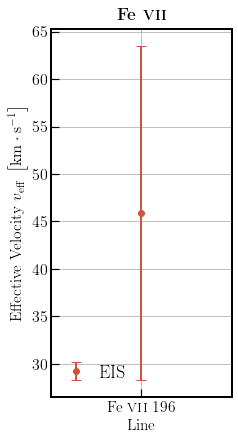

In [7]:
plot_eis_awsom_width(df,"Fe","vii",quality=["a","b"],print_veff=True)

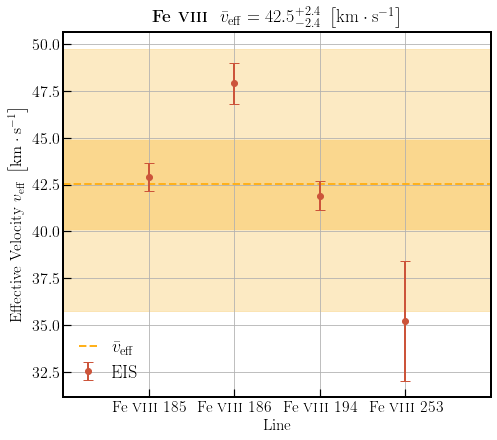

In [8]:
plot_eis_awsom_width(df,"Fe","viii",quality=["a"],plot_mle=True)

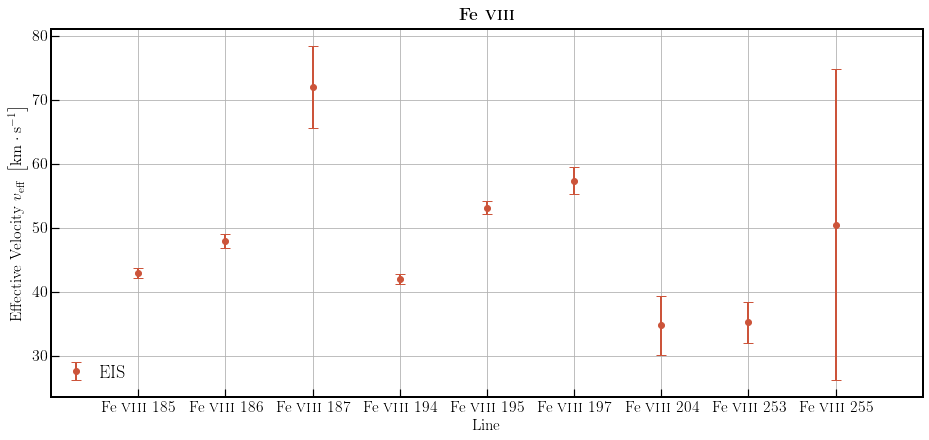

In [9]:
plot_eis_awsom_width(df,"Fe","viii",quality=["a","b"])

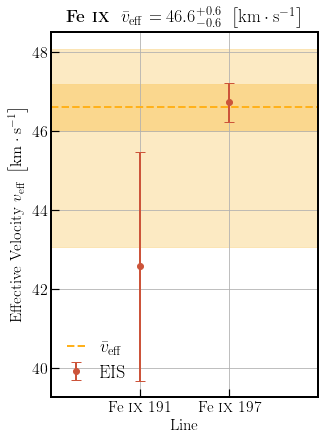

In [10]:
plot_eis_awsom_width(df,"Fe","ix",quality=["a"],plot_mle=True)

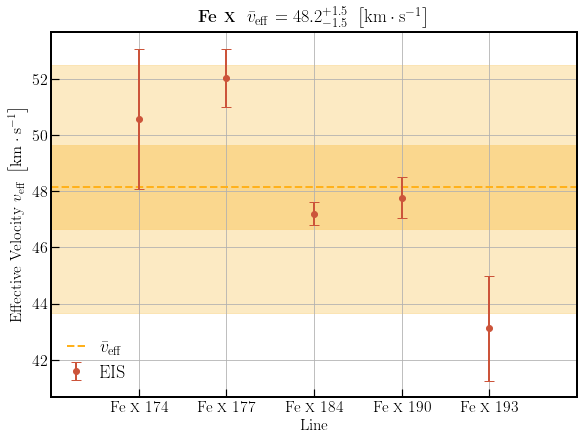

In [11]:
plot_eis_awsom_width(df,"Fe","x",quality=["a"],plot_mle=True)

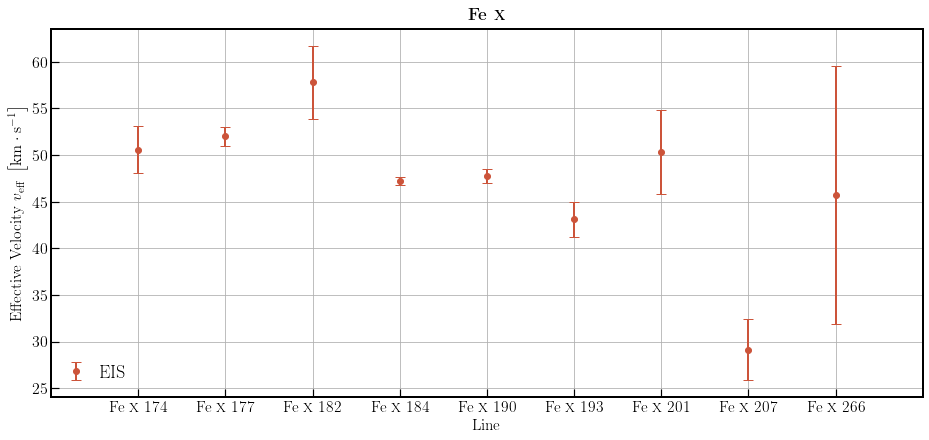

In [12]:
plot_eis_awsom_width(df,"Fe","x",quality=["a","b"],plot_mle=False)

3     49.732849
12    48.347665
13    48.326354
23    49.236084
41    53.363036
dtype: float64
3     2.362865
12    0.516985
13    0.516757
23    2.319424
41    3.851506
dtype: float64


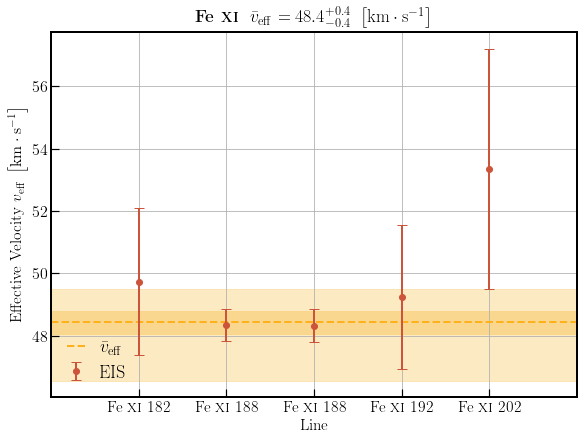

In [13]:
plot_eis_awsom_width(df,"Fe","xi",quality=["a"],plot_mle=True,print_veff=True)

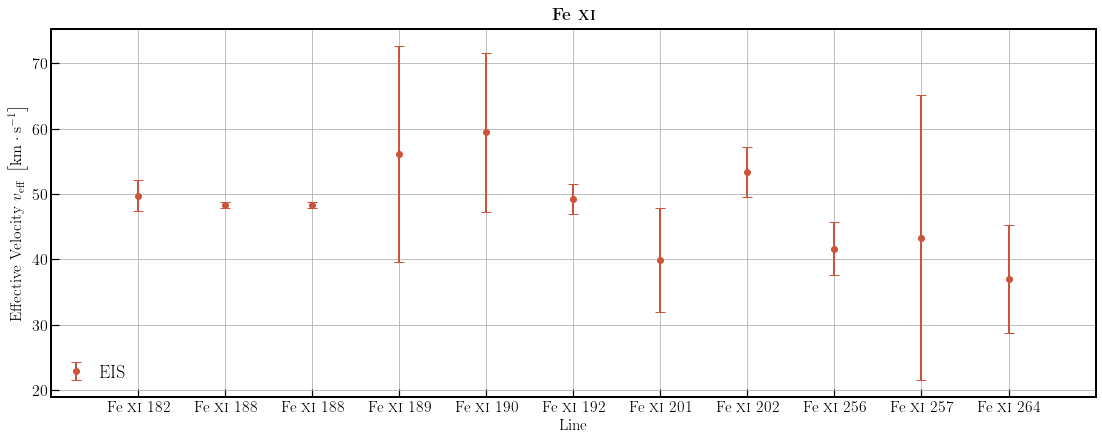

In [14]:
plot_eis_awsom_width(df,"Fe","xi",quality=["a","b"],plot_mle=False)

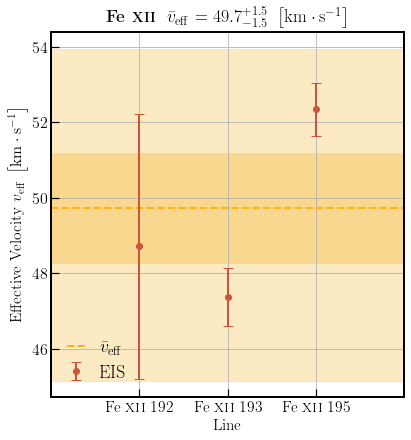

In [15]:
plot_eis_awsom_width(df,"Fe","xii",quality=["a"],plot_mle=True,save_fig=True,
save_fname="../../figs/ms/FeXII_summary_agu.pdf")

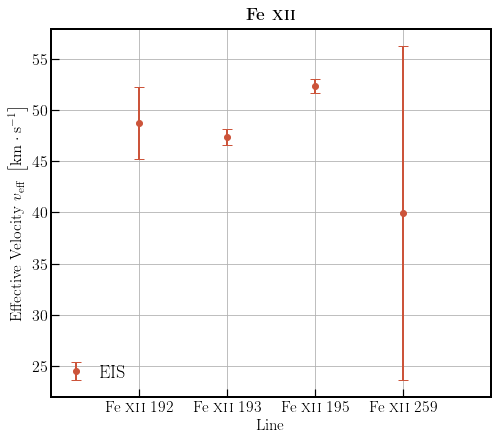

In [16]:
plot_eis_awsom_width(df,"Fe","xii",quality=["a","b"])

40    47.629365
dtype: float64
40    1.781576
dtype: float64


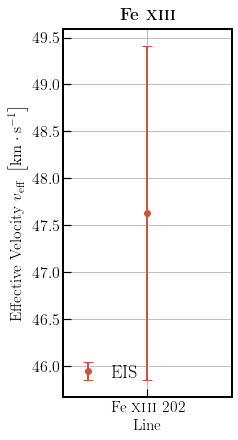

In [17]:
plot_eis_awsom_width(df,"Fe",["xiii"],quality=["a"],print_veff=True)

6    50.597039
dtype: float64
6    1.839269
dtype: float64


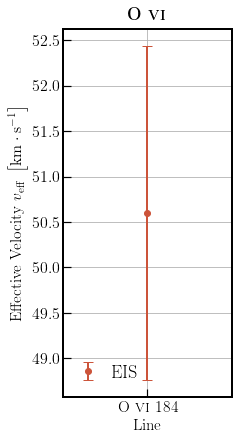

In [18]:
plot_eis_awsom_width(df,"O",["vi"],quality=["a"],print_veff=True)

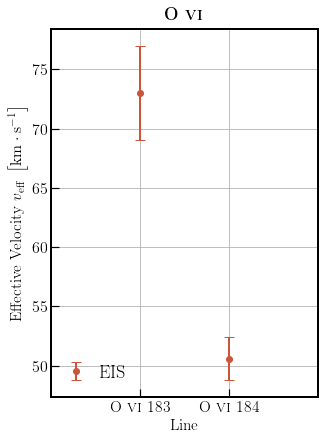

In [19]:
plot_eis_awsom_width(df,"O",["vi"],quality=["a","b"])

74    43.242805
dtype: float64
74    2.865549
dtype: float64


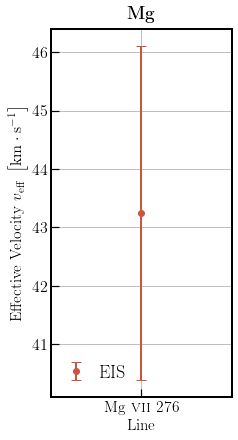

In [20]:
plot_eis_awsom_width(df,"Mg",quality=["a"],print_veff=True)

68    41.498440
74    43.242805
79    29.863523
dtype: float64
68    11.400203
74     2.865549
79     7.831780
dtype: float64


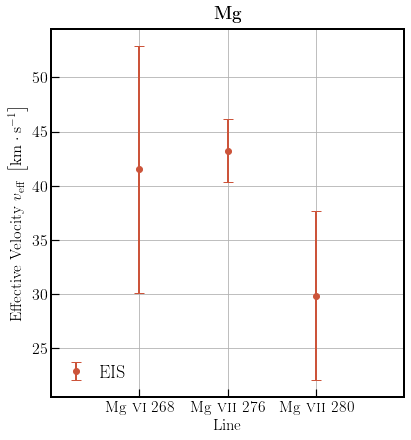

In [21]:
plot_eis_awsom_width(df,"Mg",quality=["a","b"],print_veff=True)

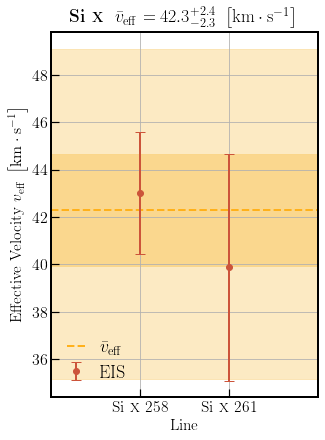

In [22]:
plot_eis_awsom_width(df,"Si","x",quality=["a"],plot_mle=True)

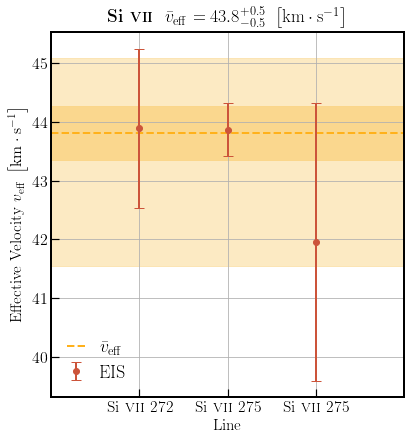

In [23]:
plot_eis_awsom_width(df,"Si","vii",quality=["a"],plot_mle=True)

59    41.248597
dtype: float64
59    18.264552
dtype: float64


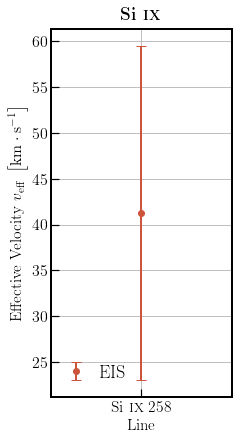

In [24]:
plot_eis_awsom_width(df,"Si","ix",quality=["a","b"],print_veff=True)

61    46.872704
64    40.880896
dtype: float64
61    9.448491
64    5.704495
dtype: float64


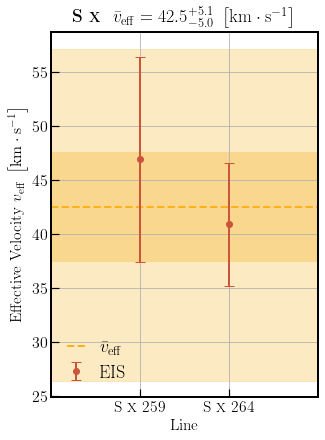

In [25]:
plot_eis_awsom_width(df,"S","x",quality=["a"],plot_mle=True,print_veff=True)

9     52.778978
21    60.887433
27    40.459331
37    33.620287
dtype: float64
9      5.766010
21     5.218926
27     4.851459
37    14.115163
dtype: float64


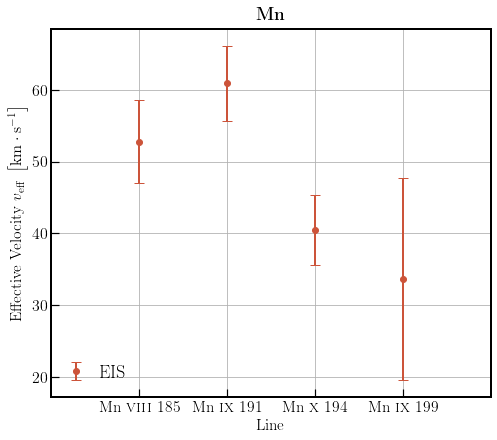

In [26]:
plot_eis_awsom_width(df,"Mn",quality=["a","b"],print_veff=True)

43    57.034104
46    41.188457
dtype: float64
43    7.798785
46    3.363638
dtype: float64


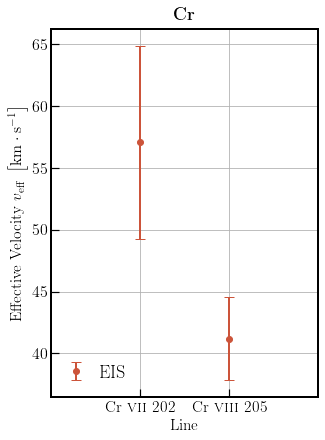

In [27]:
plot_eis_awsom_width(df,"Cr",quality=["a","b"],print_veff=True)

36    67.228655
dtype: float64
36    9.73085
dtype: float64


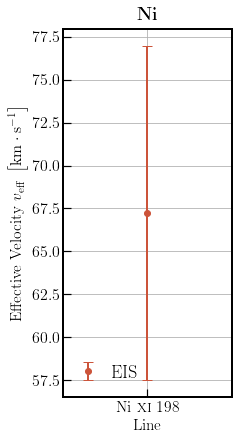

In [28]:
plot_eis_awsom_width(df,"Ni",quality=["a","b"],print_veff=True)